In [2]:
!pip install kneed

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [4]:
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [10]:
columns_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)']

preprocess = ColumnTransformer([
    ('scaler',StandardScaler(),columns_to_scale)
],remainder='passthrough')

scaled_data = preprocess.fit_transform(df)

In [11]:
scaled_data[:5]

array([[-1.42456879, -1.73899919, -0.43480148,  1.        ],
       [-1.28103541, -1.73899919,  1.19570407,  1.        ],
       [-1.3528021 , -1.70082976, -1.71591298,  0.        ],
       [-1.13750203, -1.70082976,  1.04041783,  0.        ],
       [-0.56336851, -1.66266033, -0.39597992,  0.        ]])

In [16]:
pca = PCA(n_components=2)
pca_scaled_data = pca.fit_transform(scaled_data)

In [13]:
pca.explained_variance_ratio_

array([0.4095285, 0.3081674])

In [14]:
wcss = []
for i in range(1,11):
  k = KMeans(n_clusters=i,random_state=42)
  k.fit(scaled_data)
  wcss.append(k.inertia_)
wcss

[649.2800000000002,
 438.5224115567773,
 345.20503469910574,
 254.36171423484492,
 216.78490151651047,
 181.9514362434146,
 171.37266048943803,
 153.29724063982405,
 142.71846488584754,
 133.3266400544609]

In [15]:
knee = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
knee.elbow

np.int64(4)

In [17]:
k = KMeans(n_clusters=4,init='k-means++',random_state=42)
k.fit(pca_scaled_data)

KMeans(n_clusters=4, random_state=42)

In [19]:
clusters = k.predict(pca_scaled_data)

In [34]:
clusters[:5]

array([2, 2, 0, 2, 2], dtype=int32)

In [18]:
score = silhouette_score(pca_scaled_data,k.labels_)
print(score)

0.4232584673975911


we actually want >0.5 values

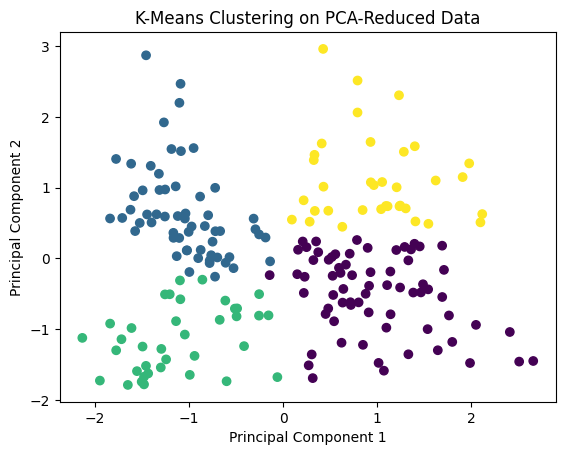

In [20]:
import matplotlib.pyplot as plt
plt.scatter(pca_scaled_data[:, 0], pca_scaled_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.show()

In [25]:
X_predicted = pd.DataFrame({'Gender' : [0],'Age':[31],'Annual Income (k$)':[17],'Spending Score (1-100)':[40]})

In [27]:
X_predcited_scaled = preprocess.transform(X_predicted)

In [30]:
X_predcited_scaled

array([[-0.56336851, -1.66266033, -0.39597992,  0.        ]])

In [31]:
X_predicted_pca_scaled = pca.transform(X_predcited_scaled)

In [32]:
predicted_value = k.predict(X_predicted_pca_scaled)

In [33]:
print(predicted_value)

[2]
